In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
data = 'C:/Users/LUCHI/Downloads/energydata_complete.csv'
df = pd.read_csv(data)

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
simple_linear_regression = df[['T1', 'RH_1']].sample(15, random_state = 2)

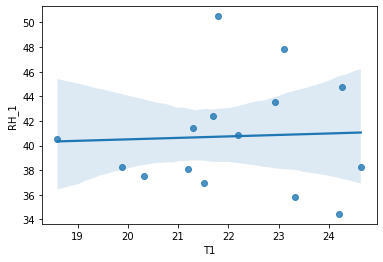

In [5]:
sns.regplot(x = 'T1', y = 'RH_1', data = simple_linear_regression)

In [7]:
#dropping the date and light columns
df.drop(['date', 'lights'], axis = 1, inplace = True)


In [8]:
#Normalizing using the Min-max scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
features_df = normalized_df.copy()
target_variable = normalized_df['Appliances']

In [10]:
#Split the dataset into the training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target_variable, test_size = 0.3, random_state = 1)

In [14]:
#Running Multiple linear Regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predictions = linear_model.predict(x_test)

print('Predicted values of Appliances are: ', predictions)

Predicted values of Appliances are:  [0.03738318 0.04672897 0.08411215 ... 0.07476636 0.55140187 0.13084112]


In [16]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
round(mae, 2)

0.0

In [17]:
#rsquared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predictions)
round(r2_score, 2)

1.0

In [24]:
#linear model of T2 and T6
X = normalized_df['T2'].values.reshape(-1, 1)

Y = normalized_df['T6'].values.reshape(-1, 1)

In [25]:
#Splitting Dataset into training and testing Data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [26]:
#Reshaping data
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1,1)

In [27]:
#Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

#obtaining predictions
predicted_values = linear_model.predict(x_test)

print('Predicted values of Appliances are: ', predicted_values)

Predicted values of Appliances are:  [[0.27457749]
 [0.44635267]
 [0.59807124]
 ...
 [0.35286298]
 [0.45206773]
 [0.39168223]]


In [28]:
#r square
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score,2)

0.65

In [30]:
#mae
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.08

In [31]:
#residual sum of squares
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2) 

65.44

In [32]:
#root mean square error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 2)

0.11

In [33]:
#coefficient of determination
linear_model.coef_

array([[0.89003912]])

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
Prediction = ridge_reg.predict(x_test)
Prediction

array([[0.27472821],
       [0.44630833],
       [0.59785461],
       ...,
       [0.3529248 ],
       [0.4520169 ],
       [0.39169997]])

In [41]:
#rmse after Ridge regression
rmse =  np.sqrt(mean_squared_error(y_test, Prediction))
round(rmse, 2)

0.11

In [45]:
#rmse after Lasso regression
Prediction2 = lasso_reg.predict(x_test)
print ('Predictions: ', Prediction2)

rmse =  np.sqrt(mean_squared_error(y_test, Prediction2))
round(rmse, 2)

Predictions:  [0.2804324  0.4446303  0.58965632 ... 0.35526459 0.45009326 0.39237146]


0.11

In [48]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df


In [52]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')